# Contents

1. Common Methods
       
2. Data preprocessing
       
3. Sparse Auto Encoder

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Input, Dense
from keras.models import Model
#from keras.regularizers import Regularizers
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

%matplotlib inline

Using TensorFlow backend.


# Common Methods

In [2]:
def show_result(test_imgs, latent_imgs, output_imgs, n=5, latent_img_width=8, latent_img_height=8):
    
    plt.figure(figsize=(n, 4))
    
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1) 
        plt.imshow(test_imgs[i].reshape(28, 28)) 
        plt.gray()
        # display code
        ax = plt.subplot(3, n, i + 1 + n) 
        plt.imshow(latent_imgs[i].reshape(latent_img_width, latent_img_height))
        plt.gray()

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n) 
        plt.imshow(output_imgs[i].reshape(28, 28)) 
        plt.gray()
    plt.show()

In [3]:
def model_history_plot(history):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

# Data preprocessing

In [4]:
# read dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize all values between 0 and 1 and flatten
# the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Sparse Autoencoder

In [5]:
def getSparseAE(epochs=2, verbose=1):
    # input layer
    input_layer = Input(shape=(784,))
    # encoding architecture
    encode_layer1 = Dense(1024, activation='relu')(input_layer)
    encode_layer2 = Dense(1024, activation='relu')(encode_layer1)
    # latent view
    latent_view = Dense(1024, activation='sigmoid', activity_regularizer=regularizers.l1(1e-5))(encode_layer2)
    # decoding architecture
    decode_layer1 = Dense(1024, activation='relu')(latent_view)
    decode_layer2 = Dense(1024, activation='relu')(decode_layer1)
    # output layer
    output_layer = Dense(784)(decode_layer2)
    # model
    model = Model(input_layer, output_layer)
    
    
    # Early dropping
    
    early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    
    # model.summary()

    model.compile(optimizer='adadelta', loss='mse')

    # fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs,  shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose, callbacks=[early])

    model_history_plot(fit.history)

    # Following codes are written for demonstration purpose only

    encoder = Model(input_layer, latent_view)
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = model.predict(x_test)
   
    return x_test, encoded_imgs, decoded_imgs








Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 21s 351us/step - loss: 0.0624 - val_loss: 0.0414
Epoch 2/100
60000/60000 [==============================] - 20s 330us/step - loss: 0.0376 - val_loss: 0.0328
Epoch 3/100
60000/60000 [==============================] - 20s 331us/step - loss: 0.0317 - val_loss: 0.0303
Epoch 4/100
60000/60000 [==============================] - 20s 331us/step - loss: 0.0293 - val_loss: 0.0295
Epoch 5/100
60000/60000 [==============================] - 20s 332us/step - loss: 0.0275 - val_loss: 0.0279
Epoch 6/100
60000/60000 [==============================] - 20s 331us/step - loss: 0.0262 - val_loss: 0.0263
Epoch 7/100
60000/60000 [==============================] - 20s 335us/step - loss: 0.0251 - val_loss: 0.0249
Epoch 8/100
60000/60000 [==============================] - 20s 334us/step - loss: 0.0242 - val_loss: 0.0242
Epoch 9/100
60000/60000 [==============================] - 20s 334us/step 

60000/60000 [==============================] - 20s 330us/step - loss: 0.0151 - val_loss: 0.0150
Epoch 52/100
60000/60000 [==============================] - 20s 330us/step - loss: 0.0150 - val_loss: 0.0150
Epoch 53/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0149 - val_loss: 0.0149
Epoch 54/100
60000/60000 [==============================] - 20s 330us/step - loss: 0.0149 - val_loss: 0.0150
Epoch 55/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 56/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0147 - val_loss: 0.0151
Epoch 57/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0147 - val_loss: 0.0148
Epoch 58/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.0146 - val_loss: 0.0146
Epoch 59/100
60000/60000 [==============================] - 20s 328us/step - loss: 0.0145 - val_loss: 0.0144
Epoch 60/100
60000/60000 [======

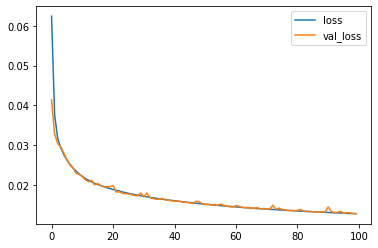

In [6]:
x_test, encoded_imgs, decoded_imgs = getSparseAE(epochs=100)

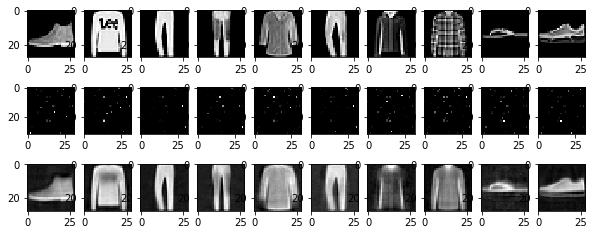

In [7]:
show_result(x_test, encoded_imgs, decoded_imgs, latent_img_width=32, latent_img_height=32, n=10)